# Data Cleaning and Exploration

The following notebook details the cleaning process and visualisation of three datasets: CNNDM, TOS;DR, and TL;DR. There was some idea at the start of the dissertation to incoroporate CNNDM into the training set of the summarisation models. This would prove to be far too computationally expensive. Therefore, of the datasets cleaned and visualised, only TOS;DR and TL;DR are used for future training.

# Table of Contents

1. Import Modules


2. Get the Datasets


3. Data Cleaning, Exploration and Visualisation


    3.1 Descriptive Statistics and Cleaning
    
        3.1.1 CNNDM Dataset
        
        3.1.2 TOS;DR Dataset
        
        3.1.3 TL;DR Dataset
        
    3.2 Visualising the Datasets
    
        3.2.1 CNNDM Dataset
        
        3.2.2 TOS;DR Dataset
        
        3.2.3 TL;DR Dataset
        
        
4. Combining the Terms and Conditions Dataset


5. Splitting the Dataset into Training, Validation and Test Set

# 1. Import Modules

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
%pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
punctuation=punctuation+ '\n'
%pip install sentencepiece
%pip install datasets
from datasets import load_dataset
%pip install transformers
from transformers import pipeline
%pip install torch
%pip install transformers
%pip install autocorrect
import autocorrect
from autocorrect import Speller
spell = Speller(lang="en")
import matplotlib
# Set seed
np.random.seed(3)

Autosaving every 120 seconds

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Note: you may need to restart the kernel to use updated packages.

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.

Note: you may need to restart the kernel to use updated packages.

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Note: you may need to restart the kernel to use updated packages.

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
           

Note: you may need to restart the kernel to use updated packages.

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Defining functions for later use

# Defining a function that returns the length 
def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections. Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: Counter() for length in lengths}
    queue = deque(maxlen=max_length)

# Defining a function that prints a wordcloud diagram
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')
    
# Above code from https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52

# Defining the loading function
def load_csv(data_path, file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path, sep=",")

pd.set_option('display.max_rows', None)

# 2. Get the Datasets

In [3]:
# Import the cnn/dm dataset from huggingface
cnndm_dataset = load_dataset("cnn_dailymail", '3.0.0')

Reusing dataset cnn_dailymail (/home/faculty/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/3cb851bf7cf5826e45d49db2863f627cba583cbc32342df7349dfe6c38060234)


In [4]:
# Uploading the tldr dataset into to the workbook
DATA_PATH = "./tldr_dataset/"
tldr_data = "tldr_data.csv"

tldr_data = load_csv(DATA_PATH, tldr_data)

In [5]:
# Uploading the tosdr datset from the tosdr_dataset folder into the notebook 
DATA_PATH = "./tosdr_dataset/"
tosdr_data = "combined.csv"

tosdr_data = load_csv(DATA_PATH, tosdr_data)

In [6]:
# Possible new code for data cleaning

import pandas as pd
import nltk
from nltk import tokenize
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


# spells = [spell(w) for w in (nltk.word_tokenize(text))]

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    # sentence tokenization
    text = str(text)
    sent_token = nltk.sent_tokenize(text)
    # text normalization
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])
    text = text.replace(":","")
    text = text.replace("\"","")
    text = text.replace("!","")
    text = text.replace("â€œ","")
    text = text.replace("â€˜","")
    text = text.replace("*","")
    text = re.sub('[’“”…]', '', text)  
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    # tokens_without_sw = [word for word in text_tokens if not word in stop_words] - stopwords are likely necessary
    # remove tokens with numbers in them
    # tokens_without_sw = [word for word in tokens_without_sw if word.isalpha()]
    # spell check and correction
    text_tokens = [spell(w) for w in text_tokens]
    filtered_sentence = (" ").join(text_tokens)
    text = filtered_sentence
    
    return text

# https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis


[nltk_data] Downloading package punkt to /home/faculty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 3. Data Cleaning, Exploration and Visualisation

## 3.1 Descriptive Statistics

### 3.1.1 CNNDM Dataset

In [7]:
# View the contents of the dataset
cnndm_dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [8]:
# Convert the training set into a dataframe, create a copy
cnndm_train = pd.DataFrame(cnndm_dataset["train"])
cnndm_train_copy = cnndm_train.copy()

In [9]:
# Check type of data
cnndm_train_copy.dtypes

article       object
highlights    object
id            object
dtype: object

In [10]:
# Convert article and highlights to string
cnndm_train_copy["article"] = cnndm_train_copy["article"].astype(str)
cnndm_train_copy["highlights"] = cnndm_train_copy["highlights"].astype(str)

In [11]:
type(cnndm_train_copy["article"].iloc[0])

str

In [12]:
# View some statistics about the datset
cnndm_train_copy.describe()

,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,"SHANGHAI, China (CNN) -- If it weren't for th...",This page includes the show Transcript and the...,10dc1958617ec7fc3f0fab3022f99b7cbcfcdaef
freq,3,83,1


Some articles or hightlights might be repeated as the number of unique articles / highlights is fewer than the count.

In [13]:
# Creating the new dataframe with no duplicates
cnndm_train_copy = cnndm_train_copy.drop_duplicates("article")
cnndm_train_copy.describe()

,article,highlights,id
count,284005,284005,284005
unique,284005,282187,284005
top,Washington (CNN) -- Bernie Sanders wants you t...,This page includes the show Transcript and the...,10dc1958617ec7fc3f0fab3022f99b7cbcfcdaef
freq,1,83,1


In [14]:
# Check for missing values
cnndm_train_copy.isna().sum()

article       0
highlights    0
id            0
dtype: int64

In [15]:
# Drop unneccessary columns
cnndm_train_copy.drop(["id"], axis=1, inplace=True)

In [16]:
cnndm_train_copy.head(5)

,article,highlights
0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [17]:
# Removing syntax
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text): 
    return TAG_RE.sub('', str(text))

In [18]:
# Removing syntax
cnndm_train_copy.article = cnndm_train_copy.article.apply(remove_tags)
cnndm_train_copy.highlights = cnndm_train_copy.highlights.apply(remove_tags)

In [19]:
# View article data
cnndm_train_copy.article.head(10)

0    It's official: U.S. President Barack Obama wan...
1    (CNN) -- Usain Bolt rounded off the world cham...
2    Kansas City, Missouri (CNN) -- The General Ser...
3    Los Angeles (CNN) -- A medical doctor in Vanco...
4    (CNN) -- Police arrested another teen Thursday...
5    (CNN) -- Thousands on Saturday fled the area i...
6    (CNN) -- Four groups that advocate for immigra...
7    While Labor Day is the unofficial end of summe...
8    Gaza City (CNN) -- An Italian humanitarian act...
9    (CNN) -- Renowned radio personality Casey Kase...
Name: article, dtype: object

In [20]:
# View highlight data
cnndm_train_copy.highlights.head(10)

0    Syrian official: Obama climbed to the top of t...
1    Usain Bolt wins third gold of world championsh...
2    The employee in agency's Kansas City office is...
3    NEW: A Canadian doctor says she was part of a ...
4    Another arrest made in gang rape outside Calif...
5    Humanitarian groups expect 4,000 refugees in o...
6    NEW: 4 groups announce legal challenge in Phoe...
7    Labor Day is the unofficial end of summer and ...
8    NEW: Autopsy indicates he had been dead for ho...
9    The radio personality was taken to a hospital ...
Name: highlights, dtype: object

In [21]:
# View a sample highlight
cnndm_train_copy.highlights.iloc[3]

'NEW: A Canadian doctor says she was part of a team examining Harry Burkhart in 2010 .\nNEW: Diagnosis: "autism, severe anxiety, post-traumatic stress disorder and depression"\nBurkhart is also suspected in a German arson probe, officials say .\nProsecutors believe the German national set a string of fires in Los Angeles .'

In [22]:
# Defining a function to remove \n from values in columns in a dataframe
def remove_enter(dataframe):
    for i in [0,1]:
        dataframe.iloc[:, i] = dataframe.iloc[:, i].replace(regex = ['\n', '\r', '\t', '\xa0'], value = '') #from an analysis of the other datasets, other space-creating characters needed correcting not just \n

# For use in a pipeline
# remove = FunctionTransformer(remover, validate = True)

In [23]:
# Remove enters
remove_enter(cnndm_train_copy)

In [24]:
# View the sample sentence above
cnndm_train_copy.highlights.iloc[3]

'NEW: A Canadian doctor says she was part of a team examining Harry Burkhart in 2010 .NEW: Diagnosis: "autism, severe anxiety, post-traumatic stress disorder and depression"Burkhart is also suspected in a German arson probe, officials say .Prosecutors believe the German national set a string of fires in Los Angeles .'

In [25]:
# Phrases to be decontracted

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have", "it`s": "it is", "didn`t": "did not", "e.g.": "for example", "i.e.": "that is"}

In [26]:
# Function defining the decontracted phrases
import re

def decontracted(phrase):
    # first lower the phrases so they the contractions are recognized
    phrase = phrase.lower()
    
    # for contractions without \     
    phrase = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in phrase.split(" ")])
    
    # specific for contractions with \
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)
    
    # general for contractions with \
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", "s", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [27]:
# Decontract the dataframe
cnndm_train_copy.article = cnndm_train_copy.article.apply(decontracted)
cnndm_train_copy.highlights = cnndm_train_copy.highlights.apply(decontracted)

In [28]:
# clean a list of lines
import string
def clean_lines(lines):
    cleaned = list()
    # prepare a translation table to remove punctuation
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    for line in lines:
        # strip source cnn office if it exists
        index = line.find('(CNN) -- ')
        if index > -1:
            line = line[index+len('(CNN)'):]
        # strip 'NEW:'' if it exists
        index = line.find('NEW:')
        if index > -1:
            line = line[index+len('NEW'):]
        line = re.sub('https?://\S+|www\.\S+', '', line)
        # tokenize on white space
        line = line.split()
        # convert to lower case
        line = [word.lower() for word in line]
        # remove punctuation from each token
        line = [w.translate(table) for w in line]
        # replace any double spaces with a single space         
#         line = re.sub('  ', ' ', str(line))
#         # remove tokens with numbers in them
#         line = [word for word in line if word.isalpha()]
        # store as string
        cleaned.append(' '.join(line))
    # remove empty strings
#     cleaned = [c for c in cleaned if len(c) > 0]
    return cleaned

# Code adapted from: https://machinelearningmastery.com/prepare-news-articles-text-summarization/

### 3.1.2 TL;DR Dataset 

In [29]:
# Put data into a dataframe and create a copy
tldr = pd.DataFrame(tldr_data)
tldr_copy = tldr.copy()

In [30]:
# Check type of data
tldr_copy.dtypes

Link         object
summary      object
full_text    object
dtype: object

In [31]:
# Some statistics about the dataset
tldr_copy.describe()

,Link,summary,full_text
count,410,399,399
unique,409,251,396
top,/licenses/browse,\n\n,\n
freq,2,146,4


From the above, the tldr dataset looks relatively much small.

There are also 3 non-unique full_texts and 148 non_unique summaries. This suggest the same summary is used for different texts - this is not necessarily the wrong thing to do as terms and conditions from different companies may essentially say the same thing (however the full text duplicates should be dropped as well as summaries containing simply \n\n). 

Further, the top word is \n, so this must be cleaned again using the function created in the previous section.

In [32]:
# Drop unneccessary columns
tldr_copy.drop(["Link"], axis=1, inplace=True)

In [33]:
# Remove \n
remove_enter(tldr_copy)

In [34]:
# Remove missing values
tldr_copy.dropna(inplace = True, axis=0)
# Reset the index
tldr_copy.reset_index(drop=True, inplace = True)

In [35]:
# Check for missing values
tldr_copy.isna().sum()

summary      0
full_text    0
dtype: int64

In [36]:
# Removing syntax
tldr_copy.full_text = tldr_copy.full_text.apply(remove_tags)
tldr_copy.summary = tldr_copy.summary.apply(remove_tags)

In [37]:
# Decontract the dataframe
tldr_copy.full_text = tldr_copy.full_text.apply(decontracted)
tldr_copy.summary = tldr_copy.summary.apply(decontracted)

In [38]:
# Creating the new dataframe with no duplicates in full text
tldr_copy = tldr_copy.drop_duplicates("full_text")

# Delete rows where summary = '  ' (as a result of deleted space holder)
tldr_copy = tldr_copy[tldr_copy.summary != ' ']
tldr_copy = tldr_copy[tldr_copy.summary != '']
tldr_copy = tldr_copy[tldr_copy.full_text != '']

In [39]:
# Creating the new dataframe with no duplicates
tldr_copy = tldr_copy.drop_duplicates("summary", keep="first")

In [40]:
#  Check an example sentence
tldr_copy.iloc[40].full_text

'do not be a dick public licenseversion 1, december 2009copyright (c) 2009 philip sturgeon email@philsturgeon.co.ukeveryone is permitted to copy and distribute verbatim or modified copies of this license document, and changing it is allowed as long as the name is changed.do not be a dick public license terms and conditions for copying, distribution and modificationdo whatever you like with the original work, just do not be a dick.being a dick includes - but is not limited to - the following instances:1a. outright copyright infringement - do not just copy this and change the name.1b. selling the unmodified original with no work done what-so-ever, that is really being a dick.1c. modifying the original work to contain hidden harmful content. that would make you a proper dick.if you become rich through modifications, related works/services, or supporting the original work, share the love. only a dick would make loads off this work and not buy the original works creator(s) a pint.code is pr

In [41]:
#  Check the corresponding example summary
tldr_copy.iloc[40].summary

'as developers we all want to protect our code from dicks that try to steal, sell, infringe or just generally rip us off. for this we have licenses like gpl, mit, etc.http://www.dbad-license.org/ '

In [42]:
# Viewing the duplicate summaries
duplicates = tldr_copy[tldr_copy.summary.duplicated()]
duplicates

,summary,full_text


In [43]:
#viewing the original text and the human summary from row index 2 to get an understanding of the cleaning required
print("Original Text :\n{}".format(tldr_copy.iloc[2].full_text))
print("\nHuman Summary :\n{}".format(tldr_copy.iloc[2].summary))

Original Text :
microsoft public license (ms-pl)this license governs use of the accompanying software. if you use the software, you accept this license. if you do not accept the license, do not use the software.1. definitionsthe terms "reproduce," "reproduction," "derivative works," and "distribution" have the same meaning here as under u.s. copyright law.a "contribution" is the original software, or any additions or changes to the software.a "contributor" is any person that distributes its contribution under this license."licensed patents" are a contributors patent claims that read directly on its contribution.2. grant of rights(a) copyright grant- subject to the terms of this license, including the license conditions and limitations in section 3, each contributor grants you a non-exclusive, worldwide, royalty-free copyright license to reproduce its contribution, prepare derivative works of its contribution, and distribute its contribution or any derivative works that you create.(b) p

.    
    

Many of the Original Text rows in the tildr dataset end with the following text as result of how the data was collected:

     Changesets

    Automatically track & comply with apache2 obligations
    Use  to manage open source licenses, from the creators of tl;drLegal


    Free to try • 60 second integration
     Learn More...

    Compare Others
    Attribute in Software
    View as JSON

                    Copyright © 2012-2015 FOSSA, Inc. All rights reserved. Built with  by @kevinverse


    Short URL for Apache License 2.0 (Apache-2.0):


    Blog - Terms - Developer API - Contact

This should be deleted from each row.

In [44]:
# Testing if Changesets is in all text
"changesetsautomatically" in tldr_copy["full_text"]

False

In [45]:
# Defining a function that cuts unneccessary text
def cutter(sentence):
    if "changesetsautomatically" in sentence:
        sentence = sentence[:sentence.index("changesetsautomatically")]
        return sentence
    else:
        sentence

In [46]:
# Cut off original text at the word "changesets"
tldr_copy["full_text"].iloc[2] = cutter(tldr_copy["full_text"].iloc[2])

In [47]:
tldr_copy["full_text"].iloc[2]

'microsoft public license (ms-pl)this license governs use of the accompanying software. if you use the software, you accept this license. if you do not accept the license, do not use the software.1. definitionsthe terms "reproduce," "reproduction," "derivative works," and "distribution" have the same meaning here as under u.s. copyright law.a "contribution" is the original software, or any additions or changes to the software.a "contributor" is any person that distributes its contribution under this license."licensed patents" are a contributors patent claims that read directly on its contribution.2. grant of rights(a) copyright grant- subject to the terms of this license, including the license conditions and limitations in section 3, each contributor grants you a non-exclusive, worldwide, royalty-free copyright license to reproduce its contribution, prepare derivative works of its contribution, and distribute its contribution or any derivative works that you create.(b) patent grant- su

In [48]:
# Cut off original text at the word "changesets"
tldr_copy["full_text"] = tldr_copy["full_text"].apply(cutter)

In [49]:
# View new original texts
print(tldr_copy["full_text"].iloc[2])

None


In [50]:
# Find row number with any empty spaces caused from the enter removal
print(np.where(tldr_copy.applymap(lambda x: x == ' ')))

(array([ 46,  61, 188, 194, 241, 242]), array([1, 1, 1, 1, 1, 1]))


As the top word used to be \n\n and some full texts contained only the text beginning with "Changesets", many summaries and texts will be empty, so these must be deleted.

In [51]:
# Delete rows where summary = '  '

tldr_copy = tldr_copy[tldr_copy.summary != ' ']
tldr_copy = tldr_copy[tldr_copy.full_text != ' ']

tldr_copy = tldr_copy[tldr_copy.summary != '  ']
tldr_copy = tldr_copy[tldr_copy.full_text != '  ']

tldr_copy = tldr_copy[tldr_copy.summary != '   ']
tldr_copy = tldr_copy[tldr_copy.full_text != '   ']

# Delete rows where summary = '  '
tldr_copy = tldr_copy[tldr_copy.summary != '']
tldr_copy = tldr_copy[tldr_copy.full_text != '']

# Remove missing values
tldr_copy.dropna(inplace = True, axis=0)

In [52]:
# Find row number with any empty spaces caused from the enter removal
print(np.where(tldr_copy.applymap(lambda x: x == ' ')))

(array([], dtype=int64), array([], dtype=int64))


In [53]:
# Reset the index after rows have been deleted
tldr_copy = tldr_copy.reset_index(drop=True)

In [54]:
# Cleaning the text and summaries
tldr_copy.full_text = clean_lines(tldr_copy.full_text)
tldr_copy.summary = clean_lines(tldr_copy.summary)

In [55]:
# Viewing the dataset
tldr_copy.head()

,summary,full_text
0,you can do what you like with the software as...,apache license version 2 0 apache license ver...
1,a short permissive software license basicall...,the mit license mit copyright c permission ...
2,you may copy distribute and modify the softwa...,gnu general public license version 2 gpl 2 0...
3,mpl is a copyleft license that is easy to comp...,mozilla public license version 2 0 1 definit...
4,this license mainly applies to libraries you ...,gnu lesser general public license version 2 1 ...


In [56]:
# View sample sentences
random_row_tldr = tldr_copy.head().sample(n = 1, random_state=100)

In [57]:
# View full_text from the random row
random_row_tldr["full_text"].iloc[0]

'the mit license  mit copyright  c  permission is hereby granted  free of charge  to any person obtaining a copy of this software and associated documentation files  the  software    to deal in the software without restriction  including without limitation the rights to use  copy  modify  merge  publish  distribute  sublicense  and or sell copies of the software  and to permit persons to whom the software is furnished to do so  subject to the following conditions the above copyright notice and this permission notice shall be included in all copies or substantial portions of the software the software is provided  as is   without warranty of any kind  express or implied  including but not limited to the warranties of merchantability  fitness for a particular purpose and noninfringement  in no event shall the authors or copyright holders be liable for any claim  damages or other liability  whether in an action of contract  tort or otherwise  arising from  out of or in connection with the 

In [58]:
# View summary from the random row
random_row_tldr["summary"].iloc[0]

'a short  permissive software license  basically  you can do whatever you want as long as you include the original copyright and license notice in any copy of the software source  there are many variations of this license in use '

In [59]:
# Number of tokens per summary and original text
tokens_per_summary = tldr_copy["summary"].apply(lambda x: len(x.split(" ")))
tokens_per_full_text = tldr_copy["full_text"].apply(lambda x: len(x.split(" ")))

# Find row numbers where summaries are greater than original text
indices_to_delete = tokens_per_summary[tokens_per_summary > tokens_per_full_text]

In [60]:
# Convert indices to dataframe
indices_to_delete = pd.DataFrame(indices_to_delete)

In [61]:
# Convert list of booleans into a list of indices
indices_to_delete = [i for i, x in indices_to_delete.iterrows()]

In [62]:
# Delete rows where summary is greater than original text
tldr_copy = tldr_copy.drop(tldr_copy.index[indices_to_delete])

In [63]:
# Delete rows where summary is the same as the original text
tldr_copy = tldr_copy[tldr_copy.summary != tldr_copy.full_text]

In [64]:
# Reset the index after rows have been deleted
tldr_copy.reset_index(drop=True, inplace=True)

In [65]:
# Check the length of the dataset
len(tldr_copy)

229

   To summarise: 

        1. Rows with summaries containing just \n\n need to be deleted.
        
        2. Excess text should be removed.
        
        3. Drop unneccessary columns.

### 3.1.3 TOS;DR Dataset

In [66]:
# Put data into a dataframe and create a copy
tosdr = pd.DataFrame(tosdr_data)
tosdr_copy = tosdr.copy()

In [67]:
# Some statistics about the dataset
tosdr_copy.describe()

,id,title,source,status,created_at,updated_at,quoteText,case_id,document_id,quoteStart,quoteEnd
count,18898,18898,18898,18707,18898,18898,16408,18898,16390,16423,16423
unique,17743,2691,3463,3481,17743,17743,15028,238,1798,12946,13077
top,id,title,source,Generated through the annotate view,created_at,updated_at,quoteText,235,document_id,quoteStart,quoteEnd
freq,1156,1156,1156,13714,1156,1156,1156,1588,1156,1156,1156


As before, there may be some repeated values, or some missing values. Due to the way the data was collected and combined outside of this notebook, the titles are repeated throughout the file (the top value for each respective title, is the title itself). These rows must be dropped.

In [68]:
# Check for missing values
tosdr_copy.isna().sum()

id                0
title             0
source            0
status          191
created_at        0
updated_at        0
quoteText      2490
case_id           0
document_id    2508
quoteStart     2475
quoteEnd       2475
dtype: int64

In [69]:
# Drop unneccessary columns
tosdr_copy.drop(["source", "status", "created_at", "updated_at", "case_id", "document_id", "quoteStart", "quoteEnd", "id"], axis=1, inplace=True)

In [70]:
# Creating the new dataframe with no duplicates
tosdr_copy = tosdr_copy.drop_duplicates("quoteText")

In [71]:
# Viewing the duplicate summaries
duplicates = tosdr_copy[tosdr_copy.title.duplicated()]

In [72]:
# Creating the new dataframe with no duplicates
tosdr_copy = tosdr_copy.drop_duplicates("title", keep="first")

In [73]:
# Remove missing values
tosdr_copy.dropna(inplace = True, axis=0)
# Remove rows with title, id and source as their content
tosdr_copy = tosdr_copy[tosdr_copy.title != 'title']

In [74]:
# View the first 10
tosdr_copy.head(10)

,title,quoteText
0,The service can delete specific content withou...,We can remove any content you post for any rea...
1,You maintain ownership of your data (the conte...,You own the rights to the content you create a...
2,"If you are the target of a copyright claim, yo...","<p>If you receive a DMCA notification, it mean..."
3,You can delete your content from this service,"You can delete any of your posts, or your acco..."
4,Users cannot scrape the website of the service,Crawling the Services is allowed if done in ac...
5,This service is only available only for people...,No children</strong>\n<p>Medium is only for pe...
6,The court of law governing the terms is in San...,Choice of law and jurisdiction.</em> These Ter...
7,The service has non-exclusive use of your content,"you grant Medium a nonexclusive, royalty-free,..."
8,This service respects your browser's Do Not Tr...,One concrete way we commit to user privacy is ...
9,The service provides information about how the...,USE OF INFORMATION


In [75]:
# View sample sentence
tosdr_copy.quoteText.iloc[2]

'<p>If you receive a DMCA notification, it means that the content described in the notice has been removed from Medium or access to the content on Medium has been restricted.'

As with the previous dataset, there are unneccessary columns and some syntax from the text that was not translated correctly (\n, < p >, <\strong>, < /em >...)

In [76]:
# Removing \n from original text
remove_enter(tosdr_copy)

In [77]:
# Find row number with any empty spaces caused from the enter removal
print(np.where(tosdr_copy.applymap(lambda x: x == '')))

(array([], dtype=int64), array([], dtype=int64))


In [78]:
# Delete rows where summary = '  '
tosdr_copy = tosdr_copy[tosdr_copy.title != ' ']
tosdr_copy = tosdr_copy[tosdr_copy.quoteText != ' ']
# Remove missing values
tosdr_copy.dropna(inplace = True, axis=0)

In [79]:
# Show the syntactic errors
def finder(x):
    result = re.findall("<[^>]+>", x)
    return result

syntax_to_delete = pd.DataFrame(tosdr_copy.quoteText.apply(finder))
syntax_to_delete.head(25)

,quoteText
0,[</p>]
1,[]
2,[<p>]
3,[]
4,[</p>]
5,"[</strong>, <p>, </p>]"
6,[</em>]
7,[]
8,[]
9,[]


In [80]:
# Deleting the syntactic errors
tosdr_copy.quoteText = tosdr_copy.quoteText.apply(lambda x : re.sub('<[^>]+>', '', x))
tosdr_copy.title = tosdr_copy.title.apply(lambda x : re.sub('<[^>]+>', '', x))

In [81]:
# Removing syntax
tosdr_copy.quoteText = tosdr_copy.quoteText.apply(remove_tags)
tosdr_copy.title = tosdr_copy.title.apply(remove_tags)

In [82]:
# Decontract the dataframe
tosdr_copy.quoteText = tosdr_copy.quoteText.apply(decontracted)
tosdr_copy.title = tosdr_copy.title.apply(decontracted)

In [83]:
# Show the new texts
tosdr_copy.quoteText.head(10)

0    we can remove any content you post for any rea...
1    you own the rights to the content you create a...
2    if you receive a dmca notification, it means t...
3    you can delete any of your posts, or your acco...
4    crawling the services is allowed if done in ac...
5    no childrenmedium is only for people 13 years ...
6    choice of law and jurisdiction. these terms ar...
7    you grant medium a nonexclusive, royalty-free,...
8    one concrete way we commit to user privacy is ...
9                                   use of information
Name: quoteText, dtype: object

In [84]:
# Reset the index
tosdr_copy = tosdr_copy.reset_index(drop=True)

In [85]:
pd.DataFrame(tosdr_copy).head()

,title,quoteText
0,the service can delete specific content withou...,we can remove any content you post for any rea...
1,you maintain ownership of your data (the conte...,you own the rights to the content you create a...
2,"if you are the target of a copyright claim, yo...","if you receive a dmca notification, it means t..."
3,you can delete your content from this service,"you can delete any of your posts, or your acco..."
4,users cannot scrape the website of the service,crawling the services is allowed if done in ac...


In [86]:
np.where(tosdr_copy.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [87]:
np.where(tosdr_copy.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [88]:
np.where(tosdr_copy.applymap(lambda x: x == '  '))

(array([], dtype=int64), array([], dtype=int64))

In [89]:
# Delete rows where summary = '  '
tosdr_copy = tosdr_copy[tosdr_copy.title != '']
tosdr_copy = tosdr_copy[tosdr_copy.quoteText != '']

tosdr_copy = tosdr_copy[tosdr_copy.title != ' ']
tosdr_copy = tosdr_copy[tosdr_copy.quoteText != ' ']

tosdr_copy = tosdr_copy[tosdr_copy.title != '  ']
tosdr_copy = tosdr_copy[tosdr_copy.quoteText != '  ']

tosdr_copy = tosdr_copy[tosdr_copy.title != '   ']
tosdr_copy = tosdr_copy[tosdr_copy.quoteText != '   ']

In [90]:
tosdr_copy.isna().sum()

title        0
quoteText    0
dtype: int64

In [91]:
# Cleaning the text further
tosdr_copy.quoteText = clean_lines(tosdr_copy.quoteText)
tosdr_copy.title = clean_lines(tosdr_copy.title)

In [92]:
# Reset the index after rows have been deleted
tosdr_copy.reset_index(drop=True, inplace=True)

In [93]:
# View sample sentence
tosdr_copy.quoteText.iloc[2]

'if you receive a dmca notification  it means that the content described in the notice has been removed from medium or access to the content on medium has been restricted '

In [94]:
# View sample sentences
random_row_tosdr = tosdr_copy.head().sample(n = 1, random_state=50)

In [95]:
# View full_text from the random row
random_row_tosdr["quoteText"].iloc[0]

'you can delete any of your posts  or your account  anytime processing the deletion may take a little time  but we’ll do it as quickly as possible we may keep backup copies of your deleted post or account on our servers for up to 14 days after you delete it '

In [96]:
# View summary from the random row
random_row_tosdr["title"].iloc[0]

'you can delete your content from this service'

In [97]:
# Number of tokens per summary and original text
tokens_per_title = tosdr_copy.title.apply(lambda x: len(x.split(" ")))
tokens_per_text = tosdr_copy.quoteText.apply(lambda x: len(x.split(" ")))

# Find row numbers where summaries are greater than original text
indices_to_delete = tokens_per_title[tokens_per_title > tokens_per_text]

# Convert indices to dataframe
indices_to_delete = pd.DataFrame(indices_to_delete)

# Convert list of booleans into a list of indices
indices_to_delete = [i for i, x in indices_to_delete.iterrows()]

# Delete rows where summary is greater than original text
tosdr_copy = tosdr_copy.drop(tosdr_copy.index[indices_to_delete])

# Delete rows where summary is the same as the original text
tosdr_copy = tosdr_copy[tosdr_copy.title != tosdr_copy.quoteText]

# Reset the index after rows have been deleted
tosdr_copy.reset_index(drop=True, inplace=True)

In [98]:
# Check the length of the dataset
len(tosdr_copy)

1008

## 3.2 Visualising the Datasets

### 3.2.1 CNNDM Dataset

In [99]:
# View the first 10 observations
cnndm_train_copy.head(10)

,article,highlights
0,it is official: u.s. president barack obama wa...,syrian official: obama climbed to the top of t...
1,(cnn) -- usain bolt rounded off the world cham...,usain bolt wins third gold of world championsh...
2,"kansas city, missouri (cnn) -- the general ser...",the employee in agencys kansas city office is ...
3,los angeles (cnn) -- a medical doctor in vanco...,new: a canadian doctor says she was part of a ...
4,(cnn) -- police arrested another teen thursday...,another arrest made in gang rape outside calif...
5,(cnn) -- thousands on saturday fled the area i...,"humanitarian groups expect 4,000 refugees in o..."
6,(cnn) -- four groups that advocate for immigra...,new: 4 groups announce legal challenge in phoe...
7,while labor day is the unofficial end of summe...,labor day is the unofficial end of summer and ...
8,gaza city (cnn) -- an italian humanitarian act...,new: autopsy indicates he had been dead for ho...
9,(cnn) -- renowned radio personality casey kase...,the radio personality was taken to a hospital ...


array([[<AxesSubplot:title={'center':'CNNDM Number of Characters per Article'}>,
        <AxesSubplot:title={'center':'CNNDM Number of Characters per Summary'}>]],
      dtype=object)

array([[<AxesSubplot:title={'center':'CNNDM Tokens per Line Article'}>,
        <AxesSubplot:title={'center':'CNNDM Tokens per Line Summary'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

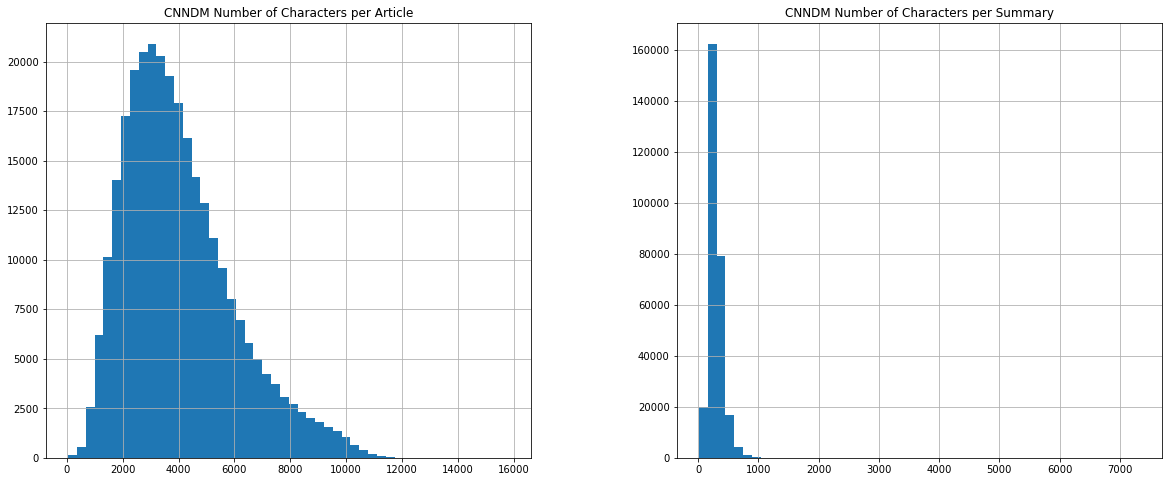

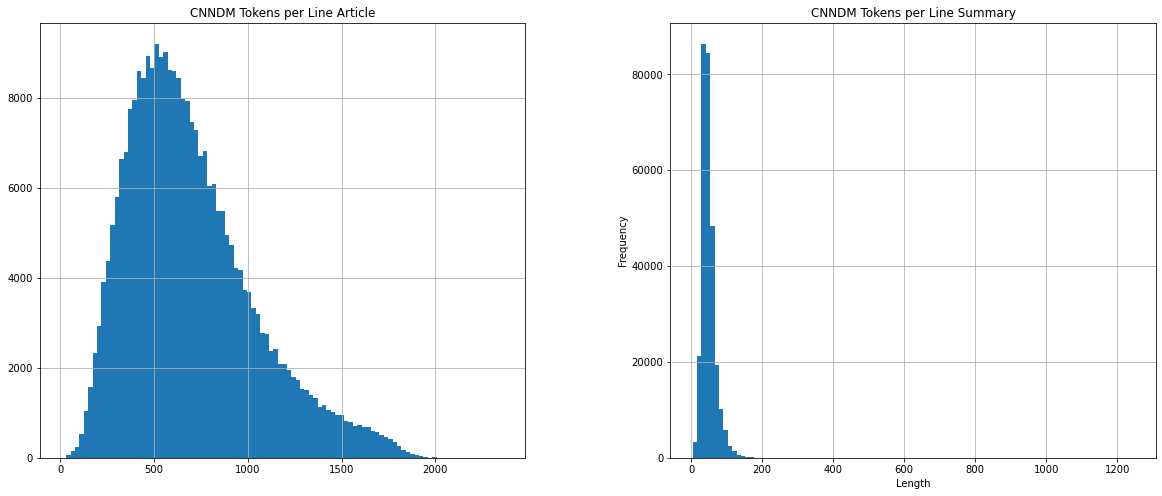

In [100]:
# Check the histograms of the character length of the article and the summary
article_length = cnndm_train_copy["article"].apply(len)
highlights_length  = cnndm_train_copy["highlights"].apply(len)

# CNNDM statistics dataframe
cnndm_stats_characters = pd.concat([article_length, highlights_length], axis = 1, keys= ["CNNDM Number of Characters per Article", "CNNDM Number of Characters per Summary"])

# CNNDM statistics about number of tokens per article / summary
tokens_per_summary = cnndm_train_copy["highlights"].apply(lambda x: len(x.split(" ")))
tokens_per_article = cnndm_train_copy["article"].apply(lambda x: len(x.split(" ")))
cnndm_stats_tokens = pd.concat([tokens_per_article, tokens_per_summary], axis = 1, keys= [ "CNNDM Tokens per Line Article", "CNNDM Tokens per Line Summary"])

%matplotlib inline
cnndm_stats_characters.hist(bins=50, figsize=(20,8))
cnndm_stats_tokens.hist(bins=100, figsize=(20,8))
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Length")
plt.show()

In [101]:
import statistics
from statistics import mean
print("Average CNNDM Article length is: {:.1f}".format(mean(article_length)))
print("Average CNNDM Summary length is: {:.1f}".format(mean(highlights_length)))
print("Average CNNDM Words per Article: {:.1f}".format(mean(cnndm_stats_tokens["CNNDM Tokens per Line Article"])))
print("Average CNNDM Words per Summary: {:.1f}".format(mean(cnndm_stats_tokens["CNNDM Tokens per Line Summary"])))

Average CNNDM Article length is: 4035.7
Average CNNDM Summary length is: 292.1
Average CNNDM Words per Article: 696.8
Average CNNDM Words per Summary: 49.0


In [102]:
# Sort the tldr datset by value of tokens per full text from highest to lowest
cnndm_stats_tokens.sort_values("CNNDM Tokens per Line Summary", ascending = False).head(5)

,CNNDM Tokens per Line Article,CNNDM Tokens per Line Summary
165898,552,1246
132815,417,1058
175422,773,1017
263933,618,894
187494,847,696


From the histogram above, and the table above, we can see that there are a few outliers in terms of summary length. Arguably, a summarization is not an effective summary if it is overly long. I will therefore cut any summaries over 150 tokens long.

In [103]:
# Find row number with over 150 tokens per summary
indices_to_delete = cnndm_stats_tokens["CNNDM Tokens per Line Summary"].apply(lambda x: x > 150)

# Convert list of booleans into a list of indices
indices_to_delete = [i for i, x in enumerate(indices_to_delete) if x == True]

In [104]:
# Delete rows with over 150 tokens per summary
cnndm_train_copy = cnndm_train_copy.drop(cnndm_train_copy.index[indices_to_delete])
# Reset the index after rows have been deleted
cnndm_train_copy.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:title={'center':'CNNDM Number of Characters per Article'}>,
        <AxesSubplot:title={'center':'CNNDM Number of Characters per Summary'}>]],
      dtype=object)

array([[<AxesSubplot:title={'center':'CNNDM Tokens per Line Article'}>,
        <AxesSubplot:title={'center':'CNNDM Tokens per Line Summary'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

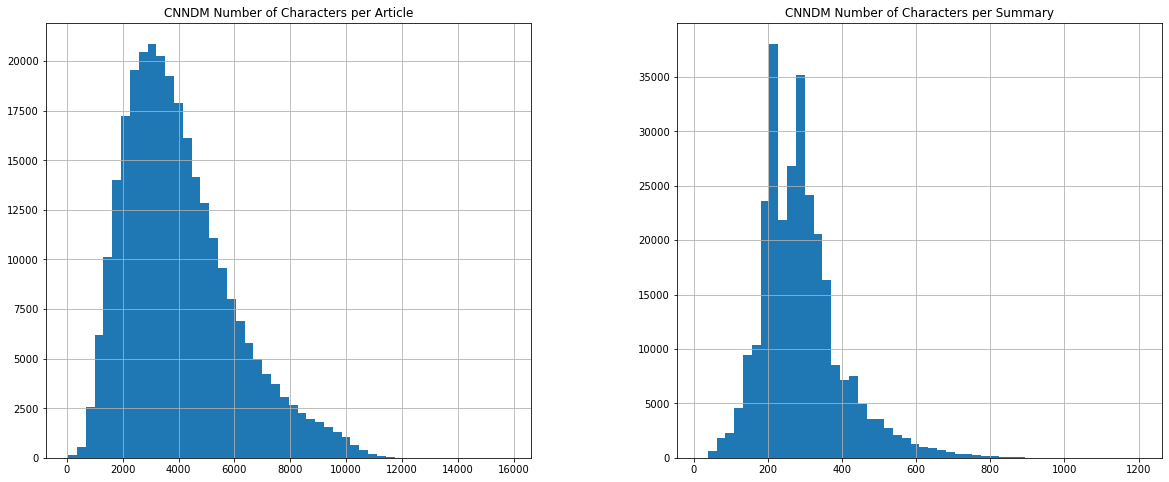

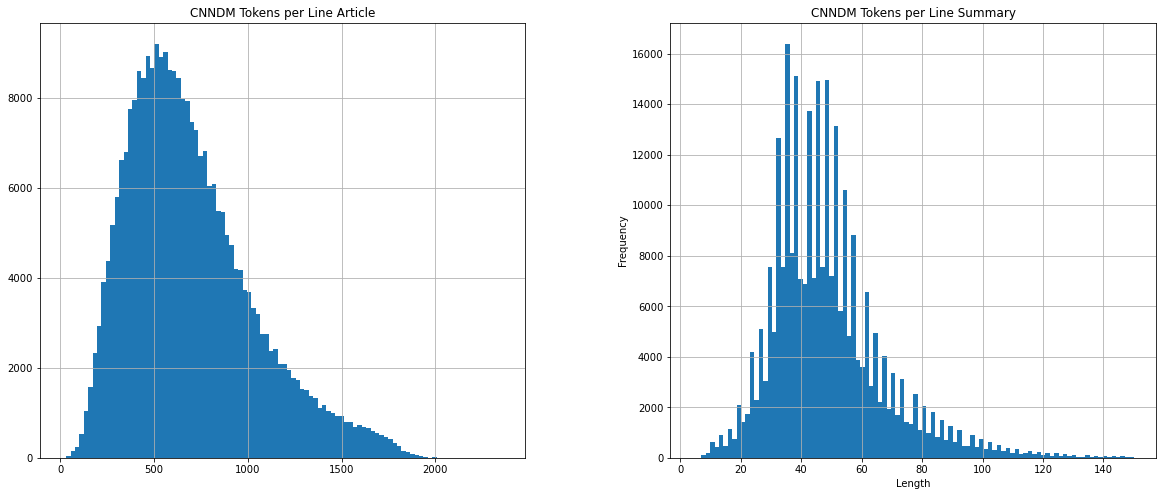

In [105]:
# Check the histograms of the character length of the article and the summary
article_length = cnndm_train_copy["article"].apply(len)
highlights_length  = cnndm_train_copy["highlights"].apply(len)

# CNNDM statistics dataframe
cnndm_stats_characters = pd.concat([article_length, highlights_length], axis = 1, keys= ["CNNDM Number of Characters per Article", "CNNDM Number of Characters per Summary"])

# CNNDM statistics about number of tokens per article / summary
tokens_per_summary = cnndm_train_copy["highlights"].apply(lambda x: len(x.split(" ")))
tokens_per_article = cnndm_train_copy["article"].apply(lambda x: len(x.split(" ")))
cnndm_stats_tokens = pd.concat([tokens_per_article, tokens_per_summary], axis = 1, keys= [ "CNNDM Tokens per Line Article", "CNNDM Tokens per Line Summary"])

%matplotlib inline
cnndm_stats_characters.hist(bins=50, figsize=(20,8))
cnndm_stats_tokens.hist(bins=100, figsize=(20,8))
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Length")
plt.show()

In [106]:
import collections
nltk.download('stopwords')
# Read input file, note the encoding is specified here 
# It may be different in your text file

a= str(cnndm_train_copy["article"])
# Stopwords
stopwords = set(STOPWORDS)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_article = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_article.head()

# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

,Word,Count
0,,315074
1,--,73681
2,(cnn),69094
3,published,52595
4,est,40704


A lot of the most frequently used words are simply denoting when the article was published.

In [107]:
# Instantiate a dictionary, and for every word in the file, 
a= str(cnndm_train_copy["highlights"])
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_summary = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_summary.head()

,Word,Count
0,,48822
1,new,17550
2,says,9335
3,will,8791
4,t,5275


In [108]:
# Create Dataframe of the two tables
word_freq = pd.merge(common_words_article,common_words_summary, how = 'outer', on=["Word"])

# Fill NaN's with 0
word_freq = word_freq.fillna(0)

In [109]:
# View top words sorted by article
word_freq.head(25)

,Word,Count_x,Count_y
0,,315074.0,48822.0
1,--,73681.0,0.0
2,(cnn),69094.0,0.0
3,published,52595.0,0.0
4,est,40704.0,0.0
5,mail,16688.0,0.0
6,reporter,16474.0,0.0
7,daily,15881.0,0.0
8,new,7873.0,17550.0
9,washington,5328.0,353.0


In [110]:
# View top words sorted by summary
word_freq.sort_values("Count_y", ascending = False).head(25)

,Word,Count_x,Count_y
0,,315074.0,48822.0
8,new,7873.0,17550.0
102,says,1237.0,9335.0
12,will,4702.0,8791.0
13,t,4696.0,5275.0
96,found,1289.0,4907.0
18,two,4141.0,4599.0
57,said,1935.0,4565.0
25,police,3310.0,4428.0
37,first,2527.0,4070.0


For words such as est, published, updated, reporter, there is no count in the highlights. This is likely due to these words simply denoting when the article was published / updated etc. I Will therefore remove these words.

In [111]:
# Words to be deleted
a = ["est", "published", "reporter", "daily", "mail", "es", "updated", "s"]
word_freq = word_freq[~word_freq['Word'].isin(a)]

In [112]:
# Drop the same words from the dataframe
def deworder(phrase):
    phrase = re.sub(r"est", "", phrase)
    phrase = re.sub(r"published", "", phrase)
    phrase = re.sub(r"reporter", "", phrase)
    phrase = re.sub(r"daily", "", phrase)
    phrase = re.sub(r"es", "", phrase)
    phrase = re.sub(r"updated", "", phrase)
    return phrase

cnndm_train_copy.article = cnndm_train_copy.article.apply(deworder)

In [113]:
# View the word frequency table head
word_freq.head(10)

,Word,Count_x,Count_y
0,,315074.0,48822.0
1,--,73681.0,0.0
2,(cnn),69094.0,0.0
8,new,7873.0,17550.0
9,washington,5328.0,353.0
11,last,5069.0,2134.0
12,will,4702.0,8791.0
13,t,4696.0,5275.0
14,man,4684.0,3135.0
15,press,4673.0,0.0


<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Count_Article')

Text(0, 0.5, 'Count_Highlights')

Text(0.5, 1.0, 'CNNDM Most Frequent Words')

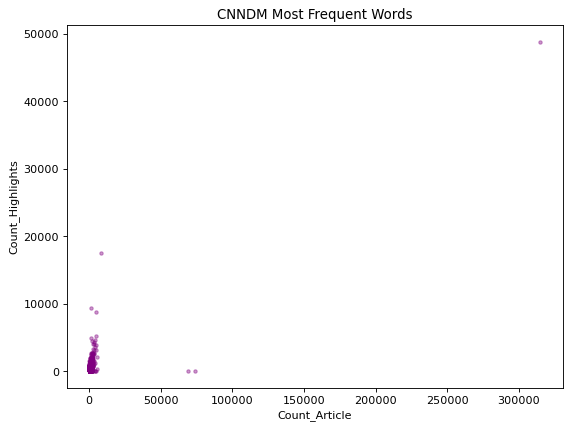

In [114]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
import numpy as np
import seaborn as sns
import pandas as pd

# Plot with transparency
plt.plot( 'Count_x', 'Count_y', "", data=word_freq, linestyle='', marker='o', markersize=3, alpha=0.4, color="purple")
 
# Titles
plt.xlabel('Count_Article')
plt.ylabel('Count_Highlights')
plt.title('CNNDM Most Frequent Words')
plt.show()

Once words which contain no information with regard to the content of the articles have been removed, we can see there is a clear positive relationship between the 1000 most frequently occurring words in the article and the highlights. There are many high frequency words that only occur in highights or articles respectively.

In [115]:
# Create a word table from the most frequent words that appear exclusively in highlights columns
word_freq_highlights = word_freq[word_freq.Count_x == 0]
word_freq_highlights.head(25)

,Word,Count_x,Count_y
1000,beat,0.0,1542.0
1001,study,0.0,1095.0
1002,per,0.0,1031.0
1003,calls,0.0,939.0
1004,near,0.0,891.0
1005,researchers,0.0,842.0
1006,cent,0.0,785.0
1007,wins,0.0,757.0
1008,photographer,0.0,742.0
1009,40,0.0,736.0


In [116]:
# Create a word table from the most frequent words that appear exclusively in article columns
word_freq_article = word_freq[word_freq.Count_y == 0]
word_freq_article.head(25)

,Word,Count_x,Count_y
1,--,73681.0,0.0
2,(cnn),69094.0,0.0
15,press,4673.0,0.0
17,associated,4177.0,0.0
21,mailonline,3930.0,0.0
40,follow,2413.0,0.0
54,robinson,2024.0,0.0
55,political,2020.0,0.0
63,angeles,1844.0,0.0
72,editor,1685.0,0.0


### 3.2.2 TILDR Dataset 

array([[<AxesSubplot:title={'center':'TLDR Text Length'}>,
        <AxesSubplot:title={'center':'TLDR Summary Length'}>],
       [<AxesSubplot:title={'center':'TLDR Summary Tokens per Line'}>,
        <AxesSubplot:title={'center':'TLDR Text Tokens per Line'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

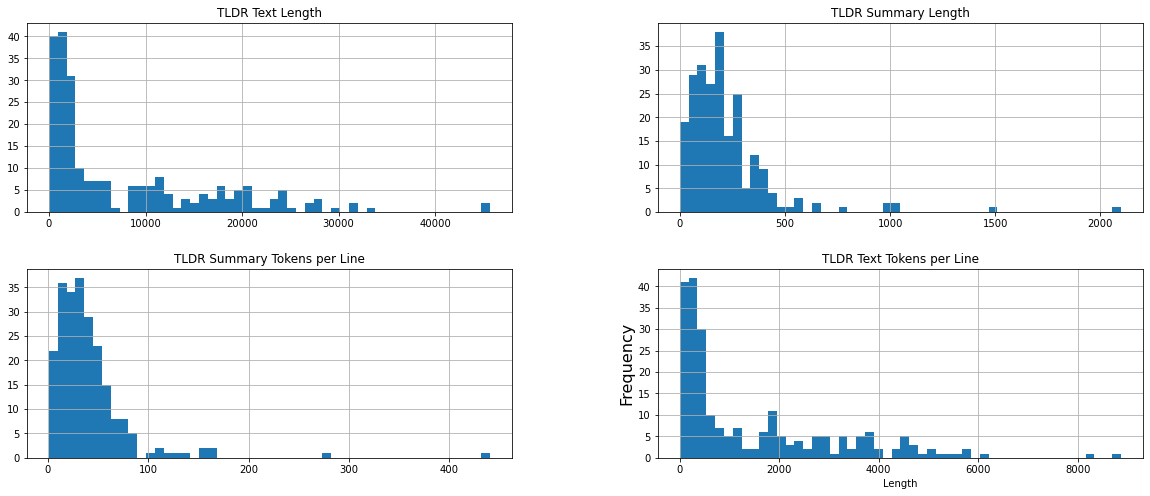

In [117]:
# Check the histograms of the character length of the article and the summary
text_length = tldr_copy["full_text"].apply(len)
summary_length  = tldr_copy["summary"].apply(len)

# TOSDR statistics dataframe
tldr_stats = pd.concat([text_length, summary_length], axis = 1, keys= ["TLDR Text Length", "TLDR Summary Length"])
tldr_stats["TLDR Summary Tokens per Line"] = tldr_copy["summary"].apply(lambda x: len(x.split(" ")))
tldr_stats["TLDR Text Tokens per Line"] = tldr_copy["full_text"].apply(lambda x: len(x.split(" ")))

%matplotlib inline
tldr_stats.hist(bins=50, figsize=(20,8))
plt.ylabel("Frequency", fontsize = 16)
plt.xlabel("Length")
plt.show()

Some summaries are overly long here also.

In [118]:
print("Average TLDR Text length is: {:.1f}".format(mean(text_length)))
print("Average TLDR Summary length is: {:.1f}".format(mean(summary_length)))
print("Average TLDR Words per Text: {:.1f}".format(mean(tldr_stats["TLDR Text Tokens per Line"])))
print("Average TLDR Words per Summary: {:.1f}".format(mean(tldr_stats["TLDR Summary Tokens per Line"])))

Average TLDR Text length is: 7853.3
Average TLDR Summary length is: 220.9
Average TLDR Words per Text: 1460.2
Average TLDR Words per Summary: 40.6


In [119]:
# Calculate the ratio of summary tokens to text tokens
tldr_stats["Ratio"] = tldr_stats["TLDR Summary Tokens per Line"] / tldr_stats["TLDR Text Tokens per Line"] 

In [120]:
# Delete rows with over 4000 characters per original text
tldr_copy = tldr_copy[tldr_copy['full_text'].apply(lambda x: len(x.split(" ")) < 500)]

# Delete rows with over 200 characters per summary
tldr_copy = tldr_copy[tldr_copy['summary'].apply(lambda x: len(x.split(" ")) < 200)]

# Reset the index after rows have been deleted
tldr_copy.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:title={'center':'TLDR Text Length'}>,
        <AxesSubplot:title={'center':'TLDR Summary Length'}>],
       [<AxesSubplot:title={'center':'TLDR Summary Tokens per Line'}>,
        <AxesSubplot:title={'center':'TLDR Text Tokens per Line'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

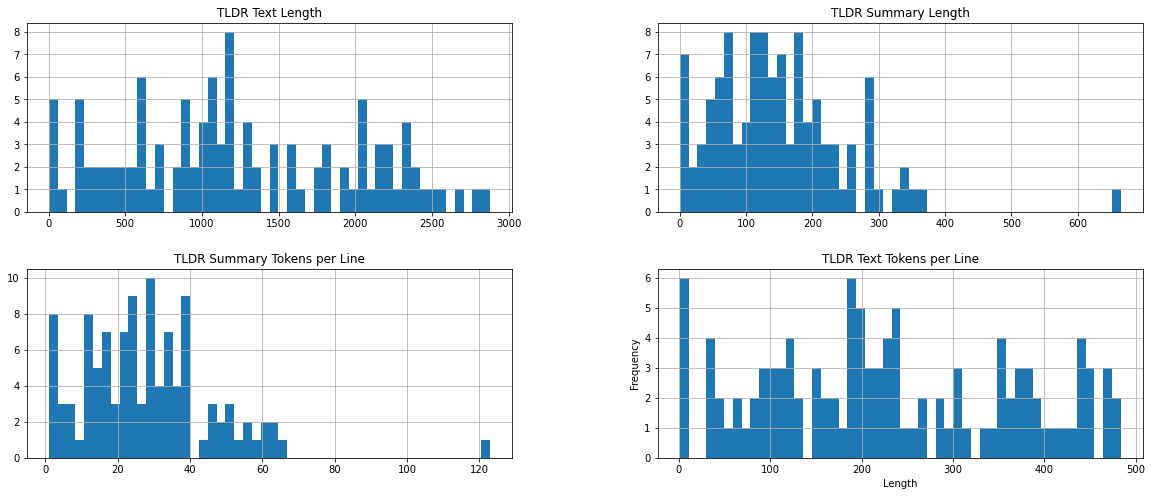

In [121]:
# Reset the index after rows have been deleted
tldr_stats.reset_index(drop=True, inplace=True)

# Check the histograms of the character length of the article and the summary
text_length = tldr_copy["full_text"].apply(len)
summary_length  = tldr_copy["summary"].apply(len)

# TLDR statistics dataframe
tldr_stats = pd.concat([text_length, summary_length], axis = 1, keys= ["TLDR Text Length", "TLDR Summary Length"])
tldr_stats["TLDR Summary Tokens per Line"] = tldr_copy["summary"].apply(lambda x: len(x.split(" ")))
tldr_stats["TLDR Text Tokens per Line"] = tldr_copy["full_text"].apply(lambda x: len(x.split(" ")))

%matplotlib inline
tldr_stats.hist(bins=50, figsize=(20,8))
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Length")
plt.show()

The TLDR dataset has more words in the text on average, but fewer number of words per summary.

In [122]:
# Sort the tldr datset by value of tokens per full text from highest to lowest
tldr_stats.sort_values("TLDR Summary Tokens per Line", ascending = False).head(5)

,TLDR Text Length,TLDR Summary Length,TLDR Summary Tokens per Line,TLDR Text Tokens per Line
69,1939,665,123,354
14,1091,341,65,209
21,2020,288,63,395
47,341,321,62,66
53,879,363,61,164


From the histogram above, it may seem that there's a few summaries that are overly long. However, the dataframe above shows the actual text is also very long - warranting a longer summary.

In [123]:
# Viewing the longest summary by tokens
tldr_copy["summary"].iloc[tldr_copy["summary"].apply(lambda x: len(x.split(" "))).idxmax()]

'the fair source license is not an open source license  but it allows everyone to see the source code and makes the software free to use for a limited number of users in your organization  it thus offers source visibility and lowered barriers to small scale initial deployment  while preserving a monopoly on charging for downstream copies and on significant organizational use any individual user can view  download  execute  and modify the code free of charge  up to a certain number of users from an organization can use the code for free  too  after an organization hits that user limit  it will start paying a licensing fee determined by the software publisher '

The summary may be a bit long, but it is not a nonsense summary.

In [124]:
# Sort the tldr datset by value of tokens per full text from highest to lowest
tldr_stats.sort_values("TLDR Summary Length", ascending = False).head(5)

,TLDR Text Length,TLDR Summary Length,TLDR Summary Tokens per Line,TLDR Text Tokens per Line
69,1939,665,123,354
53,879,363,61,164
68,1200,350,60,214
14,1091,341,65,209
13,1274,338,58,242


In [125]:
# Viewing the longest original text by tokens
tldr_copy["full_text"].iloc[tldr_copy["full_text"].apply(lambda x: len(x.split(" "))).idxmax()]

'jared m f  open source public licenseversion 1  may 2016copyright © jared newsom  aka jared m f  everyone is permitted to copy and distribute verbatim or modifiedcopies of this license document  and changing it is allowed as longas the name is changed terms and conditions for copying  distribution  and modificationas long as you retain the copyright  use the license foronly open source software  and send a cookie brownie soda tothe original people who made the original work  you can dowhat you want with it if you manage to modify the original work to do the following 2a  contain hidden viruses  and or make computers crash 2b  make computers extremely laggy  leading to outrage 2c  send you other peoples information  and laugh over it then  you will be ashamed of it  and or get thrown in jail you cannot claim the work to be your work  you have to givecredit to the original people who made the original work holding the original people who made the original work liablefor whatever happens

Viewing the shorter summaries:

In [126]:
# Sort the tldr datset by value of tokens per full text from highest to lowest
tldr_stats.sort_values("TLDR Summary Tokens per Line", ascending = True).head(25)

,TLDR Text Length,TLDR Summary Length,TLDR Summary Tokens per Line,TLDR Text Tokens per Line
54,18,4,1,4
65,1463,1,1,251
73,25,5,1,4
75,866,2,1,167
79,65,0,1,10
67,1030,41,1,186
105,3,3,1,1
108,11,3,1,1
71,19,17,4,5
78,351,30,5,73


In [127]:
# Find indices
short_list = tldr_stats.sort_values("TLDR Summary Tokens per Line", ascending = True).head(25)

# Convert list of booleans into a list of indices
indices_to_view= [i for i, x in short_list.iterrows()]

# Print values
tldr_copy.summary.iloc[indices_to_view]

54                                                  neve
65                                                     n
73                                                 hello
75                                                    ok
79                                                      
67             我不知道这里应该写什么，不过就是一个声明吧，关于congrequest代码责任自负
105                                                  wip
108                                                  mit
71                                     a common license 
78                        independent sub contractorm j 
74                                      mts a e 6 2drake
82                  a copyleft license gpl incompatible 
52         the official licence for itos system software
3                 modified mit licence for beer recipes 
72     hx711 weight scale interface with raspberry pi...
39     a highly permissive license nearly identical t...
55     an extremely simplified and shortened version ...
40     a very concise license w

Some of the shorter summaries appear non-sensical - those less than and equal to 3 tokens per sentence will be deleted.

In [128]:
# Delete rows below length 10
tldr_copy = tldr_copy[tldr_copy['summary'].apply(lambda x: len(x.split(" ")) > 3)]

# Reset the index after rows have been deleted
tldr_copy.reset_index(drop=True, inplace=True)

In [129]:
a= str(tldr_copy["full_text"])
# Stopwords
stopwords = set(STOPWORDS)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_full_text = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_full_text.head(20)

# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

,Word,Count
0,copyright,34
1,c,32
2,license,28
3,,24
4,1,18
5,public,14
6,version,13
7,software,11
8,0,9
9,permission,9


The top words of licenses are far more technical than the CNNDM dataset as expected.

In [130]:
a= str(tldr_copy["summary"])
# Stopwords
stopwords = set(STOPWORDS)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_summary_tldr = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_summary_tldr.head(20)

# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

,Word,Count
0,license,73
1,permissive,30
2,,21
3,short,13
4,software,9
5,bsd,8
6,allows,8
7,simple,8
8,clause,7
9,mit,7


There seems to be a good amount of overlap of the top words from the full text and the summary. This is a good sign as it is an indication that the key ideas / terms are preserved by the summaries.

In [131]:
# Create Dataframe of the two tables
word_freq_tldr = pd.merge(common_words_full_text,common_words_summary_tldr, how = 'outer', on=["Word"])

# Fill NaN's with 0
word_freq_tldr = word_freq_tldr.fillna(0)

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Frequency in Original Text')

Text(0, 0.5, 'Frequency in Summary')

Text(0.5, 1.0, 'TLDR Most Frequent Words')

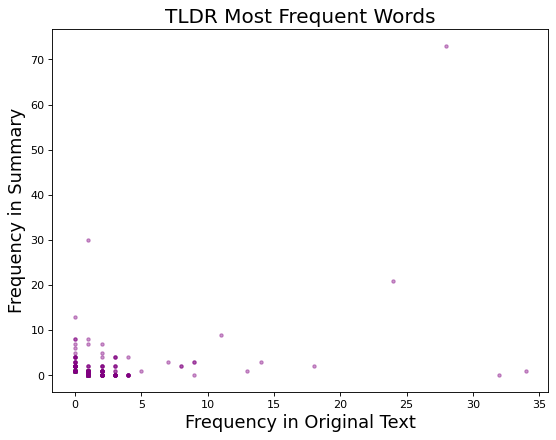

In [132]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
import numpy as np
import seaborn as sns
import pandas as pd

# Plot with transparency
plt.plot('Count_x', 'Count_y', "", data=word_freq_tldr, linestyle='', marker='o', markersize=3, alpha=0.4, color="purple")
 
# Titles
plt.xlabel('Frequency in Original Text', fontsize = 16)
plt.ylabel('Frequency in Summary', fontsize = 16)
plt.title('TLDR Most Frequent Words', fontsize = 18)
plt.show()

The relationship between the original text and the summaries appears to be flatter (meaning words that appear more frequently in the original text do not appear as often in the summaries), however, there are far fewer observations in this dataset than in the CNNDM dataset, so it is difficult to draw any meaningful conclusions from this.

### 3.2.3 TOSDR Dataset

In [133]:
# Delete rows with over 150 tokens per summary
tosdr_copy = tosdr_copy[tosdr_copy['title'].apply(lambda x: len(x.split(" ")) < 200)]

# Delete rows with over 500 characters per original text
tosdr_copy = tosdr_copy[tosdr_copy['quoteText'].apply(lambda x: len(x.split(" ")) < 500)]

In [134]:
# Delete rows below length 4
tosdr_copy = tosdr_copy[tosdr_copy['title'].apply(lambda x: len(x.split()) > 3)]

# Check the histograms of the character length of the article and the summary
quoteText_length = tosdr_copy["title"].apply(len)
title_length  = tosdr_copy["quoteText"].apply(len)

# TOSDR statistics dataframe
tosdr_stats = pd.concat([quoteText_length, title_length], axis = 1, keys= ["TOSDR Summary Length", "TOSDR Text Length"])
tosdr_stats["TOSDR Summary Tokens per Line"] = tosdr_copy["title"].apply(lambda x: len(x.split(" ")))
tosdr_stats["TOSDR Text Tokens per Line"] = tosdr_copy["quoteText"].apply(lambda x: len(x.split(" ")))

In [135]:
# Calculate the ratio of summary tokens to text tokens
tosdr_stats["Ratio"] = tosdr_stats["TOSDR Summary Tokens per Line"] / tosdr_stats["TOSDR Text Tokens per Line"] 

# Reset the index after rows have been deleted
tosdr_copy.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:title={'center':'TOSDR Summary Length'}>,
        <AxesSubplot:title={'center':'TOSDR Text Length'}>],
       [<AxesSubplot:title={'center':'TOSDR Summary Tokens per Line'}>,
        <AxesSubplot:title={'center':'TOSDR Text Tokens per Line'}>],
       [<AxesSubplot:title={'center':'Ratio'}>, <AxesSubplot:>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

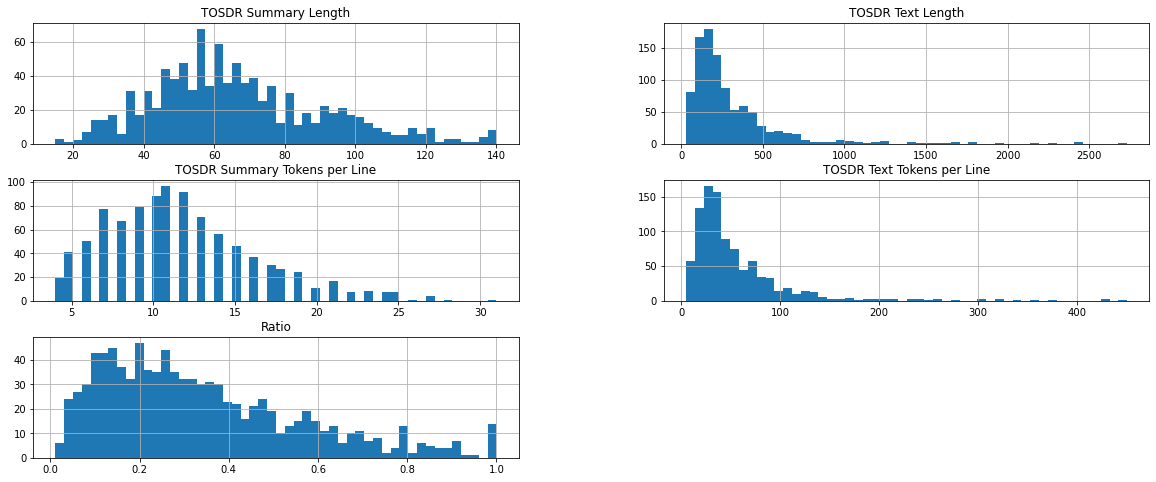

In [136]:
#Plot the graph
%matplotlib inline
tosdr_stats.hist(bins=50, figsize=(20,8))
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Length")
plt.show()

Most original texts are quite short, although there are some long ones also.

In [137]:
print("Average TOSDR Text length is: {:.1f}".format(mean(title_length)))
print("Average TOSDR Summary length is: {:.1f}".format(mean(quoteText_length)))
print("Average TOSDR Words per Text: {:.1f}".format(mean(tosdr_stats["TOSDR Text Tokens per Line"])))
print("Average TOSDR Words per Summary: {:.1f}".format(mean(tosdr_stats["TOSDR Summary Tokens per Line"])))

Average TOSDR Text length is: 301.2
Average TOSDR Summary length is: 66.2
Average TOSDR Words per Text: 55.0
Average TOSDR Words per Summary: 11.7


In [138]:
len(tosdr_copy)

965

In [139]:
# Sort the tosdr datset by value of tokens per full text from highest to lowest
tosdr_stats.sort_values("TOSDR Summary Tokens per Line", ascending = False).head(5)

,TOSDR Summary Length,TOSDR Text Length,TOSDR Summary Tokens per Line,TOSDR Text Tokens per Line,Ratio
42,140,206,31,36,0.861111
322,138,584,28,105,0.266667
95,140,481,27,80,0.337500
172,138,260,27,50,0.540000
332,119,288,27,57,0.473684


In [140]:
# Viewing the longest summary by tokens
tosdr_copy["title"].iloc[tosdr_copy["title"].apply(lambda x: len(x.split(" "))).idxmax()]

'the court of law governing the terms is in the state of new york unless you are in europe  if you are in europe  then english law will apply'

In [141]:
# Sort the tosdr datset by value of tokens per full text from highest to lowest
tosdr_stats.sort_values("TOSDR Text Length", ascending = False).head(5)

,TOSDR Summary Length,TOSDR Text Length,TOSDR Summary Tokens per Line,TOSDR Text Tokens per Line,Ratio
535,52,2734,7,451,0.015521
600,59,2445,10,432,0.023148
364,119,2426,24,430,0.055814
417,29,2275,5,427,0.011710
518,70,2163,12,374,0.032086


In [142]:
# Viewing the longest original text by character length
tosdr_copy["quoteText"].iloc[tosdr_copy["quoteText"].apply(lambda x: len(x.split(" "))).idxmax()]

'here are the types of third parties we share information with partners who use our analytics services we provide aggregated statistics and insights that help people and businesses understand how people are engaging with their posts  listings  pages  videos and other content on and off the facebook products for example  page admins and instagram business profiles receive information about the number of people or accounts who viewed  reacted to  or commented on their posts  as well as aggregate demographic and other information that helps them understand interactions with their page or account advertisers we provide advertisers with reports about the kinds of people seeing their ads and how their ads are performing  but we do not share information that personally identifies you  information such as your name or email address that by itself can be used to contact you or identifies who you are  unless you give us permission for example  we provide general demographic and interest informat

In [143]:
# Sort the tosdr datset by value of tokens per full text from highest to lowest
tosdr_stats.sort_values("TOSDR Text Tokens per Line", ascending = False).head(5)

,TOSDR Summary Length,TOSDR Text Length,TOSDR Summary Tokens per Line,TOSDR Text Tokens per Line,Ratio
535,52,2734,7,451,0.015521
600,59,2445,10,432,0.023148
364,119,2426,24,430,0.055814
417,29,2275,5,427,0.011710
518,70,2163,12,374,0.032086


This terms and conditions data set is far bigger than the previous tldr terms and conditions dataset. The fact the longest summary is so short and so clear is a very good sign for the quality of summaries.

In [144]:
a= str(tosdr_copy["quoteText"])
# Stopwords
stopwords = set(STOPWORDS)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_quoteText = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_quoteText.head(20)

# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

,Word,Count
0,,165
1,may,129
2,use,92
3,information,67
4,terms,53
5,data,52
6,agree,48
7,will,47
8,right,45
9,personal,45


Again, a lot of technical terms in the most frequent words in the terms and conditions.

In [145]:
a= str(tosdr_copy["title"])
# Stopwords
stopwords = set(STOPWORDS)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Create a data frame of the most common words 
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(1000)
common_words_title = pd.DataFrame(lst, columns = ['Word', 'Count'])

# View the dataframe
common_words_title.head(20)

# https://towardsdatascience.com/very-simple-python-script-for-extracting-most-common-words-from-a-story-1e3570d0b9d0

,Word,Count
0,service,303
1,terms,138
2,law,116
3,court,108
4,users,104
5,governing,103
6,,92
7,data,81
8,may,78
9,use,56


Many of these words are repeated in the summary which is again a good sign that the summaries capture the main ideas of the terms and conditions.

In [146]:
# Create Dataframe of the two tables
word_freq_tosdr = pd.merge(common_words_quoteText,common_words_title, how = 'outer', on=["Word"])
word_freq_tosdr = word_freq_tosdr.rename(columns = {"Count_x" : "Original Text", "Count_y" : "Summary"})

# Fill NaN's with 0
word_freq_tosdr = word_freq_tosdr.fillna(0)

In [147]:
# View this table
word_freq_tosdr.head(10)

,Word,Original Text,Summary
0,,165.0,92.0
1,may,129.0,78.0
2,use,92.0,56.0
3,information,67.0,39.0
4,terms,53.0,138.0
5,data,52.0,81.0
6,agree,48.0,20.0
7,will,47.0,29.0
8,right,45.0,19.0
9,personal,45.0,54.0


<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Frequency in Original Text')

Text(0, 0.5, 'Frequency in Summary')

Text(0.5, 1.0, 'TOSDR Most Frequent Words')

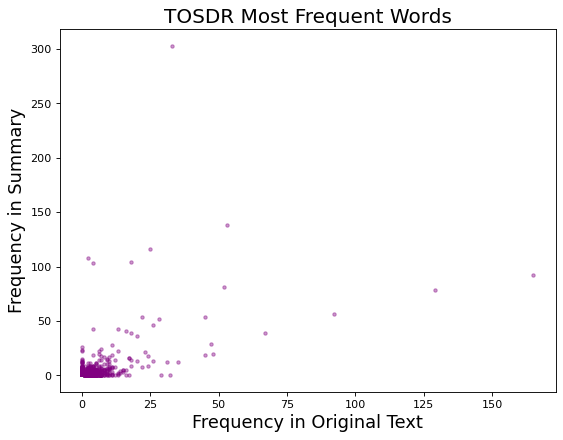

In [148]:
# libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
import numpy as np
import seaborn as sns
import pandas as pd

# Plot with transparency
plt.plot( 'Original Text', 'Summary', "", data=word_freq_tosdr, linestyle='', marker='o', markersize=3, alpha=0.4, color="purple")
 
# Titles
plt.xlabel('Frequency in Original Text', fontsize = 16)
plt.ylabel('Frequency in Summary', fontsize = 16)
plt.title('TOSDR Most Frequent Words', fontsize = 18)
plt.show()

There is again a positive correlation and again words that appear commonly in the original text appear less frequently in the summaries.

# 4. Combining the Terms and Conditions Dataset

In [149]:
# Length of tosdr dataset
len(tosdr_copy)

965

In [150]:
# Length of tldr dataset
len(tldr_copy)

102

In [151]:
# Rename the columns
tldr_copy = tldr_copy.rename(columns = {"full_text" : "Original Text", "summary" : "Summary"})
tosdr_copy = tosdr_copy.rename(columns = {"quoteText" : "Original Text", "title" : "Summary"})

# Combining the tldr and tosdr datset
tac_dataset = pd.concat([tldr_copy, tosdr_copy], axis = 0)

array([[<AxesSubplot:title={'center':'TAC Text Length'}>,
        <AxesSubplot:title={'center':'TAC Summary Length'}>],
       [<AxesSubplot:title={'center':'TAC Summary Tokens per Line'}>,
        <AxesSubplot:title={'center':'TAC Text Tokens per Line'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Length')

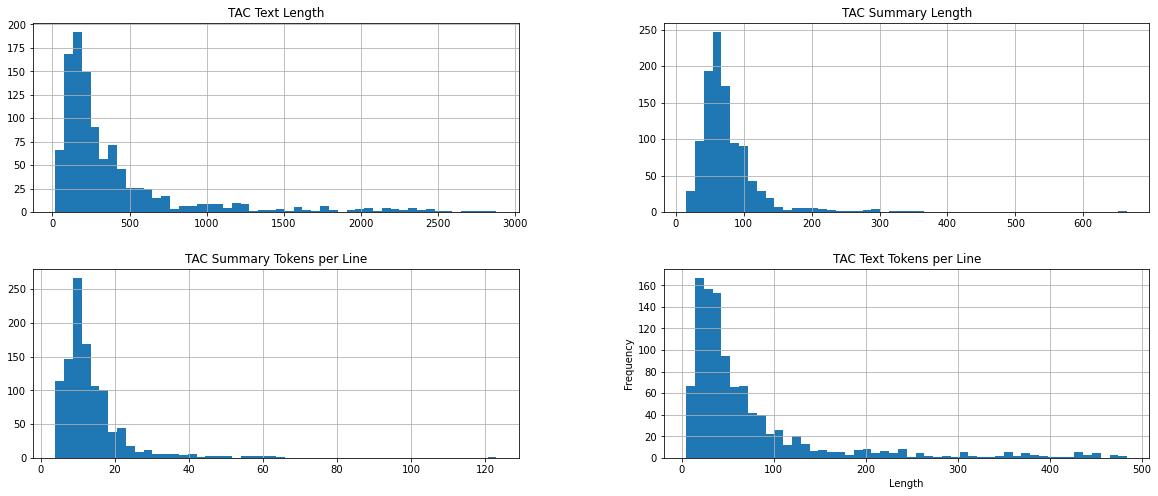

Average TAC Text length is: 396.8
Average TAC Summary length is: 75.1
Average TAC Words per Text: 72.9
Average TAC Words per Summary: 13.5


In [152]:
# Check average length of texts in the combined dataset

# Check the histograms of the character length of the article and the summary
tac_text_length = tac_dataset["Original Text"].apply(len)
tac_summary_length  = tac_dataset["Summary"].apply(len)

# TOSDR statistics dataframe
tac_stats = pd.concat([tac_text_length, tac_summary_length], axis = 1, keys= ["TAC Text Length", "TAC Summary Length"])
tac_stats["TAC Summary Tokens per Line"] = tac_dataset["Summary"].apply(lambda x: len(x.split(" ")))
tac_stats["TAC Text Tokens per Line"] = tac_dataset["Original Text"].apply(lambda x: len(x.split(" ")))

%matplotlib inline
tac_stats.hist(bins=50, figsize=(20,8))
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Length")
plt.show()

print("Average TAC Text length is: {:.1f}".format(mean(tac_text_length)))
print("Average TAC Summary length is: {:.1f}".format(mean(tac_summary_length)))
print("Average TAC Words per Text: {:.1f}".format(mean(tac_stats["TAC Text Tokens per Line"])))
print("Average TAC Words per Summary: {:.1f}".format(mean(tac_stats["TAC Summary Tokens per Line"])))

There is a heavy positive skew - in the interest of saving GPU space for training the models, the text needs to be shortened.

In [153]:
# Delete rows with over 550 tokens per original text
tac_dataset = tac_dataset[tac_dataset['Original Text'].apply(lambda x: len(x) < 550)]

# Delete rows with over 200 tokens per summary
tac_dataset = tac_dataset[tac_dataset['Summary'].apply(lambda x: len(x) < 200)]

# Reset the index after rows have been deleted
tac_dataset.reset_index(drop=True, inplace=True)

array([[<AxesSubplot:title={'center':'Original Text Length'}>,
        <AxesSubplot:title={'center':'Summary Length'}>],
       [<AxesSubplot:title={'center':'Number of Tokens per Original Text'}>,
        <AxesSubplot:title={'center':'Number of Tokens per Summary'}>]],
      dtype=object)

Text(0, 0.5, 'Frequency')

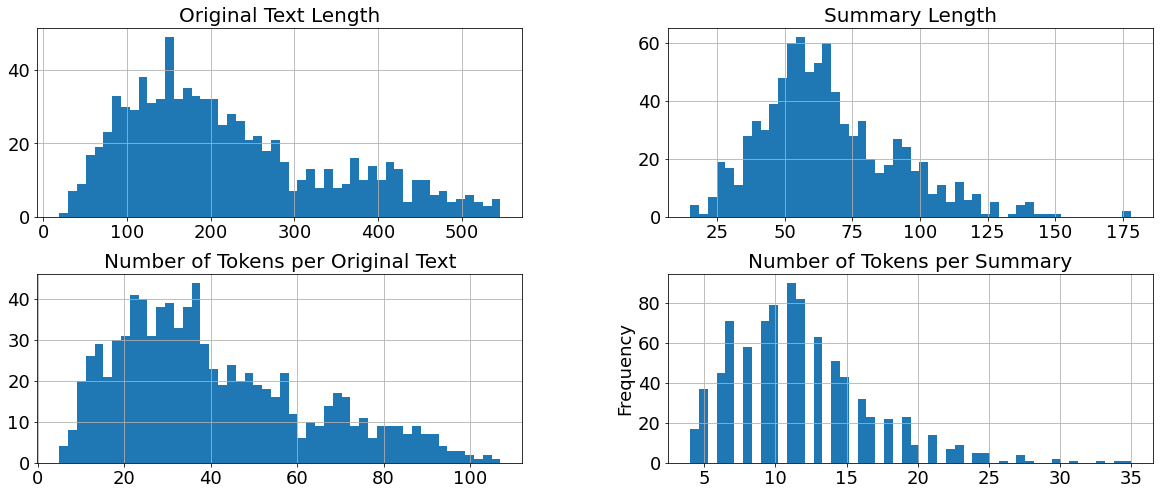

Average TAC Text length is: 221.1
Average TAC Summary length is: 66.2
Average TAC Words per Text: 40.9
Average TAC Words per Summary: 11.8


In [154]:
# Check average length of texts in the combined dataset

# Check the histograms of the character length of the article and the summary
tac_text_length = tac_dataset["Original Text"].apply(len)
tac_summary_length  = tac_dataset["Summary"].apply(len)

# TOSDR statistics dataframe
tac_stats = pd.concat([tac_text_length, tac_summary_length], axis = 1, keys= ["Original Text Length", "Summary Length"])
tac_stats["Number of Tokens per Original Text"] = tac_dataset["Original Text"].apply(lambda x: len(x.split(" ")))
tac_stats["Number of Tokens per Summary"] = tac_dataset["Summary"].apply(lambda x: len(x.split(" ")))


%matplotlib inline
MEDIUM = 18
BIGGER = 20
matplotlib.rc('font', size=MEDIUM)
matplotlib.rc('axes', titlesize=BIGGER)
tac_stats.hist(bins=50, figsize=(20,8))
plt.ylabel("Frequency")
plt.show()

print("Average TAC Text length is: {:.1f}".format(mean(tac_text_length)))
print("Average TAC Summary length is: {:.1f}".format(mean(tac_summary_length)))
print("Average TAC Words per Text: {:.1f}".format(mean(tac_stats["Number of Tokens per Original Text"])))
print("Average TAC Words per Summary: {:.1f}".format(mean(tac_stats["Number of Tokens per Summary"])))

The distributions look far more normal (still a positive skew). Therefore, while the model will not be able to deal with very extreme lengths of text (above 550 tokens), it will still be able to deal with the more extreme lengths.

In [156]:
np.where(tac_stats["Number of Tokens per Original Text"] == 0)[0]

array([], dtype=int64)

In [158]:
# Find row number where value is 0
indices_to_delete = np.where(tac_stats["Number of Tokens per Original Text"] == 0)[0].tolist()

# Delete those rows
tac_dataset = tac_dataset.drop(tac_dataset.index[indices_to_delete])

# Reset the index after rows have been deleted
tac_dataset.reset_index(drop=True, inplace=True)

Compression rates are the number of words in the reference summary divided by the number words in the original text.

<AxesSubplot:>

Text(0.5, 1.0, 'Compression Rates')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Number of words in summary / Number of words in original text')

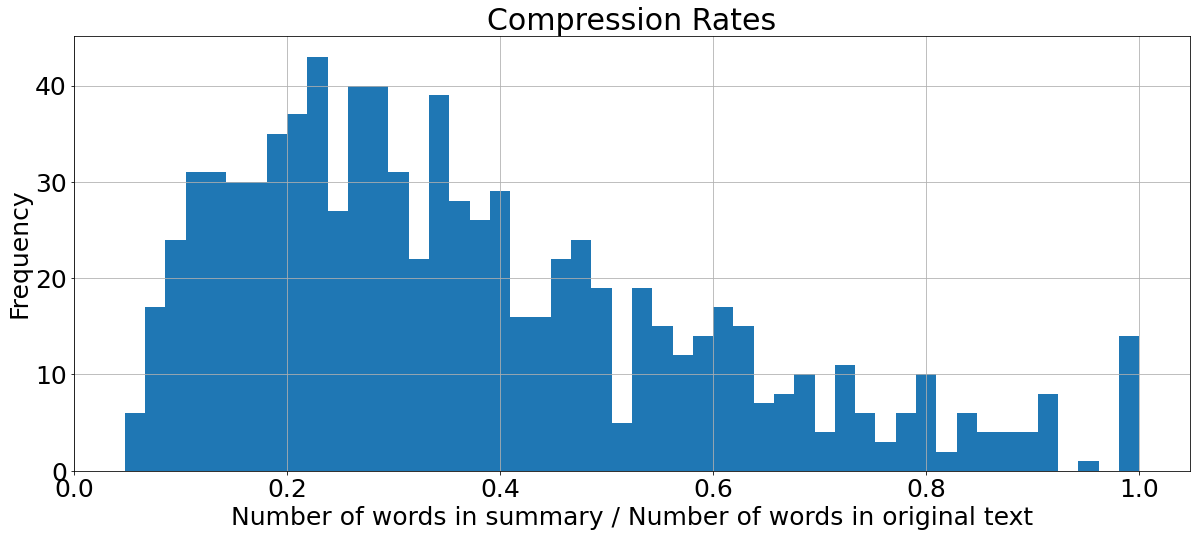

In [159]:
# View compression rates
tac_stats = pd.DataFrame()
tac_stats["TAC Summary Tokens per Line"] = tac_dataset["Summary"].apply(lambda x: len(x.split(" ")))
tac_stats["TAC Text Tokens per Line"] = tac_dataset["Original Text"].apply(lambda x: len(x.split(" ")))

compression_rates = tac_stats["TAC Summary Tokens per Line"] / tac_stats["TAC Text Tokens per Line"] 

MEDIUM = 25
BIGGER = 30

%matplotlib inline
matplotlib.rc('font', size=MEDIUM)
matplotlib.rc('axes', titlesize=BIGGER)
compression_rates.hist(bins=50, figsize=(20,8))
plt.title('Compression Rates')
plt.ylabel("Frequency", rotation = 90)
plt.xlabel("Number of words in summary / Number of words in original text")
plt.show()

In [160]:
# Mean compression rates
mean(compression_rates)

0.37142373849821414

In [161]:
# View locations where summary token length and original text token length are equal
np.where(compression_rates == 1)

(array([ 45,  49,  92, 177, 250, 260, 275, 325, 352, 393, 435, 669, 809,
        846]),)

Although the same length, the summary is not equal to the original text. I therefore leave them in as rewording is also useful.

In [162]:
# Check the length of the dataset
len(tac_dataset)

868

In [163]:
# Check the unique n-grams in the dataset from summary to original text
def flatten(x):
    result = []
    for el in x:
        if hasattr(el, "__iter__") and not isinstance(el, str):
            result.extend(flatten(el))
        else:
            result.append(el)
    return result

# Code from https://stackoverflow.com/questions/17485747/how-to-convert-a-nested-list-into-a-one-dimensional-list-in-python

sum_onegrams = set(flatten(tac_dataset["Summary"].apply(lambda x: x.split(" ")).values.tolist()))
text_onegrams = set(flatten(tac_dataset["Original Text"].apply(lambda x: x.split(" ")).values.tolist()))

In [164]:
# Finding unique n-grams
unique1 = list(set(text_onegrams) - set(sum_onegrams))

In [165]:
# See if there is an overlap of values between summary set and the original text set
counter = 0
def overlapper(row1, row2):
    for x in row1:
        if x in row2:
            counter += 1
            
overlapper(tac_dataset["Summary"], tac_dataset["Original Text"])

In [166]:
# Percentage of unique onegrams
(len(sum_onegrams) - counter) / len(sum_onegrams)

1.0

In [167]:
# Proportion of unique one-grams in summaries not in original text
len(unique1) / len(text_onegrams) 

0.7469941161422359

In [168]:
summary_list = flatten(tac_dataset["Summary"].apply(lambda x: x.split(" ")).values.tolist())
text_list = flatten(tac_dataset["Original Text"].apply(lambda x: x.split(" ")).values.tolist())
sum_2grams = set()
text_2grams = set()

# 5. Split Data into Training, Validation and Test Set

In [169]:
# The size of each dataset
print("Contents and number of rows of the CNNDM dataset: \n{}".format(cnndm_dataset))
print("Number of rows of the tldr dataset: {}".format(len(tldr.index)))
print("Number of rows of the tosdr dataset: {}".format(len(tosdr.index)))

Contents and number of rows of the CNNDM dataset: 
DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})
Number of rows of the tldr dataset: 410
Number of rows of the tosdr dataset: 18898


In [172]:
from sklearn.model_selection import train_test_split

# Split datset into original text (X) and summaries (y)
X = tac_dataset["Summary"]
y = tac_dataset["Original Text"]

# Split the dataset into training and test set
X_tac_train, X_tac_test, y_tac_train, y_tac_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Split the dataset into training and test set
X_tac_valid, X_tac_test, y_tac_valid, y_tac_test = train_test_split(X_tac_test, y_tac_test, test_size=0.2, random_state=3)

# Make new datasets
tac_train_dataset = pd.concat([X_tac_train, y_tac_train], axis = 1)
tac_valid_dataset = pd.concat([X_tac_valid, y_tac_valid], axis = 1)
tac_test_dataset = pd.concat([X_tac_test, y_tac_test], axis = 1)

Split was done 3 times, with random states 1,2,3.

In [174]:
# Pickle datasets for later use

# T&Cs
tac_train_dataset.to_pickle('tac_train_dataset_nodups3.pickle')
tac_valid_dataset.to_pickle('tac_valid_dataset_nodups3.pickle')
tac_test_dataset.to_pickle('tac_test_dataset_nodups3.pickle')

# CNNDM
# cnndm_train_copy.to_pickle('cnndm_train_copy.pickle')